In [5]:
# from dataset.trackml.dataset   import load_event, load_dataset
# from dataset.trackml.randomize import shuffle_hits
# from dataset.trackml.score     import score_event
# from dataset.others import *

import os

import numpy as np
import pandas as pd

from trackml.dataset import load_event
from trackml.randomize import shuffle_hits
from trackml.score import score_event

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns



from sklearn.cluster.dbscan_ import dbscan
from sklearn.preprocessing import StandardScaler
#import hdbscan as _hdbscan

#     #------------------------------------------------------
#     def hdbscan(X, min_samples=1, min_cluster_size=5, cluster_selection_method='eom'):

#         cl = _hdbscan.HDBSCAN(
#             min_samples=min_samples,
#             min_cluster_size=min_cluster_size,
#             cluster_selection_method=cluster_selection_method #eom #leaf
#         )
#         labels = cl.fit_predict(X)
#         labels = labels+1

#         return labels


#     def do_dbscan_predict(df):

#         x  = df.x.values
#         y  = df.y.values
#         z  = df.z.values
#         r  = np.sqrt(x**2+y**2)
#         d  = np.sqrt(x**2+y**2+z**2)
#         a  = np.arctan2(y,x)
#         zr = z/r
#         dr = d/r

#         results = []
#         if 1:

#             dz = -0.00012
#             for i in range(14):
#                 print('\rforward %d'%i, end='', flush=True)
#                 dz = dz + ( i*0.00001)
#                 aa = a + np.sign(z)*dz*z

#                 f0 = aa
#                 f1 = zr
#                 f2 = aa/zr
#                 f3 =  1/zr
#                 f4 = f2 + f3

#                 X = StandardScaler().fit_transform(np.column_stack([
#                     f0,f1,f2,f3,f4,
#                 ]))

#                 _,l = dbscan(X, eps=0.0035, min_samples=1, algorithm='auto', n_jobs=4)
#                 #l = hdbscan(X, min_samples=3, min_cluster_size=10, cluster_selection_method='eom')

#                 unique,reverse,count = np.unique(l,return_counts=True,return_inverse=True)
#                 c = count[reverse]
#                 c[np.where(l==0)]=0
#                 c[np.where(c&gt;20)]=0
#                 results.append((l,c))

#                 #return l

#         #the other direction
#         if 1:

#             dz = 0.00012
#             for i in range(14):
#                 print('\rbackward %d'%i, end='', flush=True)
#                 dz = dz - ( i*0.00001)
#                 aa = a + np.sign(z)*dz*z

#                 f0 = aa
#                 f1 = zr
#                 f2 = aa/zr
#                 f3 =  1/zr
#                 f4 = f2 + f3

#                 X = StandardScaler().fit_transform(np.column_stack([
#                     f0,f1,f2,f3,f4,
#                 ]))

#                 _,l = dbscan(X, eps=0.0035, min_samples=1, algorithm='auto', n_jobs=4)
#                 #l = hdbscan(X, min_samples=3, min_cluster_size=10, cluster_selection_method='eom')

#                 unique,reverse,count = np.unique(l,return_counts=True,return_inverse=True)
#                 c = count[reverse]
#                 c[np.where(l==0)]=0
#                 c[np.where(c&gt;20)]=0
#                 results.append((l,c))


#         #----------------------------------------

#         labels, counts = results[0]

#         for i in range(1,len(results)):
#             l,c = results[i]
#             idx = np.where((c-counts&gt;0))[0]
#             labels[idx] = l[idx] + labels.max()
#             counts[idx] = c[idx]

#         return labels





#     ## reference----------------------------------------------
#     def do_hdbscan0_predict(df):
#         x = df.x.values
#         y = df.y.values
#         z = df.z.values
#         r = np.sqrt(x**2+y**2)
#         d = np.sqrt(x**2+y**2+z**2)

#         X = StandardScaler().fit_transform(np.column_stack([
#             x/d, y/d, z/r
#         ]))

#         labels = hdbscan(X,
#                 min_samples=1,
#                 min_cluster_size=5,
#                 cluster_selection_method='eom')

#         return labels


#     def do_dbscan0_predict(df):
#         x = df.x.values
#         y = df.y.values
#         z = df.z.values
#         r = np.sqrt(x**2+y**2)
#         d = np.sqrt(x**2+y**2+z**2)

#         X = StandardScaler().fit_transform(np.column_stack([
#             x/d, y/d, z/r
#         ]))
#         _,labels = dbscan(X,
#                    eps=0.0075,
#                    min_samples=1,
#                    algorithm='auto',
#                    n_jobs=-1)

#         #labels = hdbscan(X, min_samples=1, min_cluster_size=5, cluster_selection_method='eom')

#         return labels




#     #########################################

#     def run_dbscan():

#         data_dir = '/root/share/project/kaggle/cern/data/__download__/train_100_events'

#         event_ids = [
#             '000001030',##
#             '000001025','000001026','000001027','000001028','000001029',

#         ]
#         sum=0
#         sum_score=0
#         for i,event_id in enumerate(event_ids):
#             hits, cells, particles, truth = load_event(data_dir +'/event' + event_id)

#             #track_id0 = do_dbscan0_predict(hits)
#             #track_id0 = do_hdbscan0_predict(hits)
#             track_id1 = do_dbscan_predict(hits)

#             #--------------------------------
#                  track_id = track_id1
#             #--------------------------------

#             submission = pd.DataFrame(columns=['event_id', 'hit_id', 'track_id'],
#                 data=np.column_stack(([int(event_id),]*len(hits), hits.hit_id.values, track_id))
#             ).astype(int)

#             score = score_event(truth, submission)
#             print('[%2d] score : %0.8f'%(i, score))
#             sum_score += score
#             sum += 1

#         print('--------------------------------------')
#         print(sum_score/sum)


#     #########################################


#     def run_make_submission():

#         data_dir = '/root/share/project/kaggle/cern/data/__download__/test'
#         submissions = []

#         for event_id, hits, cells in load_dataset(data_dir, parts=['hits', 'cells']):
#             print('event_id : ', event_id)

#             track_id = do_dbscan_predict(hits)

#             # Prepare submission for an event
#             submission = pd.DataFrame(columns=['event_id', 'hit_id', 'track_id'],
#                 data=np.column_stack(([event_id,]*len(hits), hits.hit_id.values, track_id))
#             ).astype(int)
#             submissions.append(submission)

#         # Create submission file
#         submission = pd.concat(submissions, axis=0)
#         submission.to_csv('/root/share/project/kaggle/cern/results/submission_dbscan.f00.csv.gz', index=False, compression='gzip')

#     '''
#     submit.py: calling main function ... 
#     backward 13[ 0] score : 0.37099081
#     backward 13[ 1] score : 0.32620248
#     backward 13[ 2] score : 0.33440214
#     backward 13[ 3] score : 0.33777442
#     backward 13[ 4] score : 0.34493481
#     backward 13[ 5] score : 0.35903709
#     --------------------------------------
#     0.34555695741568976
#     '''

#     # main #################################################################
#     if __name__ == '__main__':
#         print( '%s: calling main function ... ' % os.path.basename(__file__))

#         #run_dbscan()
#         run_make_submission()

#         print('\nsucess!')

Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


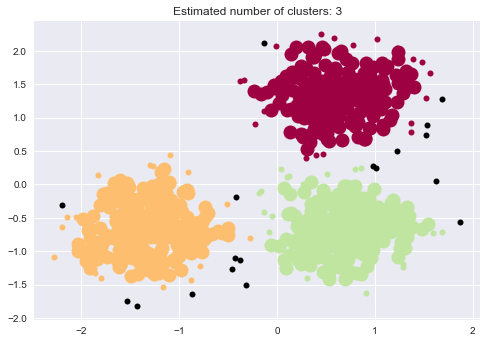

In [6]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [8]:
X.shape

(750, 2)